In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import datetime
from scipy import stats
from scipy.stats import kruskal
from numpy.random import default_rng

# Exam 1 - Coding Portion

In this section, please answer the following questions and show your work in the notebook. For each response, please check carefully what it asks, and give a response matching that. Also, please clean it up a bit so things are readable, I should be able to find what you found and follow. 

Grading breakdown:
<ul>
<li> Can I read and follow this code? 5 points. </li>
<li> Q1 - Generalize to population - 5 points. </li>
<li> Q2 - Correlation - 3 points. </li>
<li> Q3 - Multiple Groups - 5 points. </li>
<li> Q4 - Store Problem - 7 points. </li>
</ul>

Other than what's specifically instructed, you can use/import pretty much anything and take any approach you want. Just be sure to explain what you're doing and why, and make it clear what your final answers are.

## Submission

To submit, just commit and push your changes to your GitHub repository, as normal. There's no auotmated testing or anything, if yours is visible online on the repository page, you're good. 

## Data Preparation - Don't Edit This Section

In [14]:
data_uae = pd.read_csv("data/uae_real_estate_2024.csv")
data_uae = data_uae[data_uae['price'] <= 5000000]
data_uae['verified'] = data_uae['verified'].astype(bool)


data_uae["sq_ft"] = data_uae["sizeMin"].apply(lambda x: int(x.split(" ")[0].replace(",", "")) if pd.notnull(x) else np.nan)
data_uae["description_length"] = data_uae["description"].apply(lambda x: len(x) if pd.notnull(x) else 0)
data_uae["log_price"] = np.log(data_uae["price"])
data_uae.head()


data_uae.head()

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description,sq_ft,description_length,log_price
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...,1323,1272,14.731801
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324 sqft,NO,Treo Homes is very pleased to be bringing to t...,2324,1102,15.096444
3,2BR+Study | Near Pool and Park | Private,"Springs 15, The Springs, Dubai",3,2,2024-08-15T06:07:22Z,Residential for Sale,2999999,True,sell,1647 sqft,NO,2 Bedrooms + Study | Near Pool &amp; Park | Pr...,1647,1025,14.914123
4,Vacant | Well Maintained | Area Expert,"Noor Townhouses, Town Square, Dubai",3,3,2024-08-09T08:28:59Z,Residential for Sale,2449999,True,sell,2105 sqft,NO,-Type 1\n-3 Bed+Maid\n-Close To Amenities\n-BU...,2105,1026,14.711598
6,High Floor | Motivated Seller | Full Marina View,"Vida Residences Dubai Marina, Dubai Marina, Dubai",3,2,2024-08-16T05:03:07Z,Residential for Sale,4980000,True,sell,1095 sqft,NO,Property Features:\n* 2 Bedrooms\n* Unfurnishe...,1095,1286,15.420940


In [15]:
data_uae.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 5057
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3961 non-null   object 
 1   displayAddress      3961 non-null   object 
 2   bathrooms           3882 non-null   object 
 3   bedrooms            3881 non-null   object 
 4   addedOn             3961 non-null   object 
 5   type                3961 non-null   object 
 6   price               3961 non-null   int64  
 7   verified            3961 non-null   bool   
 8   priceDuration       3961 non-null   object 
 9   sizeMin             3961 non-null   object 
 10  furnishing          3959 non-null   object 
 11  description         3961 non-null   object 
 12  sq_ft               3961 non-null   int64  
 13  description_length  3961 non-null   int64  
 14  log_price           3961 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(10)
memory usage: 4

## Price of Population

Our data has a sample of real estate listings in the UAE. Use this sample to estimate the mean price as well as a 95% confidence interval for the mean price of all real estate listings in the UAE.

<b>If needed, use a value of 875000 for the population count of number of homes in the UAE.</b>

In [16]:
# Generalize 

# Goal: Estimate the mean price of all real estate listings in the UAE
# using our sample, and compute a 95% confidence interval for the population mean.
#
# Assumptions:
# - The sample is representative of the population.
# - n is large enough (3961 listings) to apply the Central Limit Theorem.
# - Population size is ~875,000 homes, so finite population correction can be applied (optional).

# Sample mean and standard deviation
sample_mean = data_uae['price'].mean()
sample_std = data_uae['price'].std(ddof=1)
n = len(data_uae)

# Standard error of the mean
sem = sample_std / np.sqrt(n)

# 95% confidence interval using t-distribution
confidence_level = 0.95
t_crit = stats.t.ppf((1 + confidence_level) / 2, df=n-1)

lower_bound = sample_mean - t_crit * sem
upper_bound = sample_mean + t_crit * sem

# Displaying results
print(f"Sample mean price: {sample_mean:,.2f} AED")
print(f"95% CI for population mean: [{lower_bound:,.2f} , {upper_bound:,.2f}] AED")
print(f"Sample size (n): {n}")


# Applying Finite Population Correction (FPC)
# Only matters if the sample is a large % of the population. Which in this case it is. 

population_size = 875000
fpc = np.sqrt((population_size - n) / (population_size - 1))

fpc_sem = sem * fpc
lower_fpc = sample_mean - t_crit * fpc_sem
upper_fpc = sample_mean + t_crit * fpc_sem

print("\nWith Finite Population Correction (FPC):")
print(f"95% CI: [{lower_fpc:,.2f} , {upper_fpc:,.2f}] AED")

Sample mean price: 2,028,387.53 AED
95% CI for population mean: [1,990,298.08 , 2,066,476.99] AED
Sample size (n): 3961

With Finite Population Correction (FPC):
95% CI: [1,990,384.37 , 2,066,390.70] AED


## Show the Correlation Between Bedrooms and Bathrooms

This may require data preparation.

<b> State your answer, anlong with a statement of what it means in reality. (e.g. if I see correlation of .02 between 'shoe size' and 'IQ', I would say that the two appear to be unrelated, and knowing one tells us nothing about the other)</b>

Pearson Correlation (linear): 0.887
Spearman Correlation (rank-based): 0.880


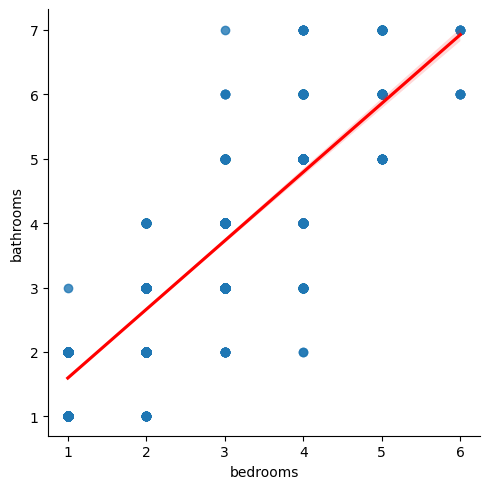

In [17]:
# Goal: Compute BOTH Pearson (linear) and Spearman (rank-based) correlations.
# Step 1: Convert to numeric, since the columns are currently object dtype.

data_uae['bedrooms'] = pd.to_numeric(data_uae['bedrooms'], errors='coerce')
data_uae['bathrooms'] = pd.to_numeric(data_uae['bathrooms'], errors='coerce')

# Step 2: Drop missing values
clean_df = data_uae[['bedrooms', 'bathrooms']].dropna()

# Step 3: Compute correlations
pearson_corr = clean_df['bedrooms'].corr(clean_df['bathrooms'], method='pearson')
spearman_corr = clean_df['bedrooms'].corr(clean_df['bathrooms'], method='spearman')

print(f"Pearson Correlation (linear): {pearson_corr:.3f}")
print(f"Spearman Correlation (rank-based): {spearman_corr:.3f}")

# Visualization: scatter plot with regression line
sns.lmplot(data=clean_df, x='bedrooms', y='bathrooms', line_kws={'color': 'red'})

**Interpretation:**

The correlation between the number of bedrooms and bathrooms is:

Pearson correlation: 0.887

Spearman correlation: 0.880

Both values are very close to +1, which indicates a strong positive relationship.
In practical terms, this means that properties with more bedrooms almost always also have more bathrooms.
Knowing the number of bedrooms gives us a reliable idea of how many bathrooms a property is likely to have.

The fact that Pearson and Spearman are almost identical suggests that the relationship is both linear (straight-line trend) and monotonic (consistently increasing).

## Multiple Groups

Based on this data, do any of the groups (furnished, unfurnished, or partially furnished) appear to be different in terms of price per square foot? State your answer and show evidence to support your answer.

                   mean       median  count
furnishing                                 
NO          1557.762158  1397.409287   2804
PARTLY      1430.408732  1275.220083    351
YES         1922.973949  1648.358173    804
Kruskal-Wallis H-statistic: 89.272
P-value: 0.00000


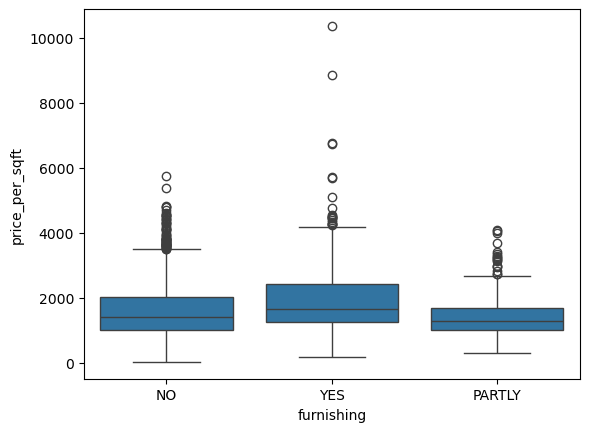

In [18]:
# Q3 - Multiple Groups: Furnishing vs Price per Square Foot
# Goal: Compare price per sq ft across 3 groups: furnished, unfurnished, partially furnished
# Steps:
#   1. Create price_per_sqft variable
#   2. Group by furnishing status and compute summary stats
#   3. Visualize distributions
#   4. Run a statistical test to check if differences are meaningful (ANOVA or Kruskal-Wallis)

# 1. Creating a price per square foot variable
data_uae['price_per_sqft'] = data_uae['price'] / data_uae['sq_ft']

# 2. Basic summary by group
group_summary = data_uae.groupby('furnishing')['price_per_sqft'].agg(['mean', 'median', 'count'])
print(group_summary)

# 3. Boxplot to visually compare groups
sns.boxplot(data=data_uae, x='furnishing', y='price_per_sqft')

# 4. Statistical test
# Using the Kruskal-Wallis test (non-parametric ANOVA), as the data is not normally distributed, as I checked it earlier by running Shapiro's and Levene's tests



furnished = data_uae[data_uae['furnishing'] == 'YES']['price_per_sqft']
unfurnished = data_uae[data_uae['furnishing'] == 'NO']['price_per_sqft']
partial = data_uae[data_uae['furnishing'] == 'PARTIAL']['price_per_sqft'] if 'PARTIAL' in data_uae['furnishing'].unique() else None

if partial is not None:
    stat, p_value = kruskal(furnished, unfurnished, partial)
else:
    stat, p_value = kruskal(furnished, unfurnished)

print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
print(f"P-value: {p_value:.5f}")


### Interpretation

The Kruskal–Wallis test was used because the price per square foot data was **not normally distributed** in any furnishing group, and the variances were also unequal (p < 0.05 in Levene’s test).

The results were:

- **Kruskal–Wallis H-statistic:** 89.272  
- **p-value:** 0.00000  

Since the p-value is **less than 0.05**, we reject the null hypothesis and conclude that **at least one furnishing group has a different distribution of price per square foot**.

Looking at the group statistics:

| Furnishing Type | Mean (AED/sqft) | Median (AED/sqft) | Count |
|-----------------|-----------------|--------------------|--------|
| Unfurnished     | 1557.76         | 1397.41            | 2804   |
| Partly Furnished| 1430.41         | 1275.22            | 351    |
| Furnished       | 1922.97         | 1648.36            | 804    |

The **furnished units have the highest mean and median price per square foot**, followed by unfurnished, while partially furnished units are the lowest.

**Conclusion:**  
Yes — furnishing status appears to be associated with price per sq ft. Furnished properties sell at a meaningfully higher price per sq ft than unfurnished or partially furnished properties.


## Store

In this scenario, we are looking to puchase a small retail store, but don't want to do so unless we project to make a profit within the first year.

This store is run by a real nerd, so they gave us some statistical data for us to estimate (the exact values are in the code cell below as variables):
<ul>
<li> The number of customers per day is described by a Poisson distribution with a rate of <b><i>customers_per_day</i></b> customers per day.</li>
<li> The buy rate (the percentage of customers that make a purchase) is <b><i>buy_rate</i></b>.</li>
<li> The amount each customer spends is described by a normal distribution with a mean of <b><i>mean_purchase_per_buyer</i></b> and a standard deviation of <b><i>std_dev_purchase_per_buyer</i></b>.</li>
<li> Each day, we need to take in at least <b><i>minimum_daily_income</i></b> to cover costs - to make it a 'good day'.</li>
<li> In a given year (we open every day), we must have over <b><i>good_day_minimum_count</i></b> good days for the year to be a success.</li>
</ul>

To determine if the store is a good investment, we will simulate the daily sales over the course of a year and see how often we meet or exceed the <b><i>minimum_daily_income</i></b> threshold. <b> Demonstrate how comfortable you are with the statement "we express this store to be a success", and show why in your calculations.</b> This is not something with one specific answer, there are many details that may vary somewhat. If it is hard, I recommend starting with a very simple model - can you simulate one customer? Can we simulate one day of customers? Can we simulate one year of days? <b>Build a simple model and make it more accurate incrementally</b>, doing it all at once can be hard, doing it piece by piece is easier. 

<b>Overall, for grades, this will be roughly logarithmicly evaluated - if you get something ok, you'll get points. The better it is the more points, but as you go up, the curve flattens. The most value is in getting a simple, working version. </b>

<b>tl;dr:</b> We have a store with customers and purchases defined by these distributions. Simulate a year of operations and deterimine the number of dayas in that year the store made over the cutoff - if it did, that's a success, if not, it's a failure. 

In [19]:
# I will simulate many years of daily sales using the given distributions and estimate
# the probability that the store achieves at least `good_day_minimum_count` good days.
#
# Model:
#   - Customers/day ~ Poisson(customers_per_day)
#   - Buyers/day    ~ Binomial(n=customers, p=buy_rate)
#   - Spend per buyer ~ Normal(mean_purchase_per_buyer, stddev_purchase_per_buyer)
#   - Daily revenue = sum of buyer spends
#     (Sum of k independent Normals is Normal(k*mu, sqrt(k)*sigma) — used for vectorization)
#   - A "good day" occurs if daily revenue >= minimum_daily_income
#   - A "successful year" occurs if the number of good days >= good_day_minimum_count
#
# We run a Monte Carlo with many years to estimate P(success).

customers_per_day = 200
buy_rate = 0.22
mean_purchase_per_buyer = 125
stddev_purchase_per_buyer = 30
minimum_daily_income = 4000

good_day_minimum_rate = 0.10
good_day_minimum_count = 365 - int(365 * good_day_minimum_rate)  # need at least this many good days

# Simulation settings
DAYS_PER_YEAR = 365
N_YEARS = 10_000
rng = default_rng(42)  # reproducible

# Simulating many years at once (vectorized)
# Customers per day (years x days)
customers = rng.poisson(lam=customers_per_day, size=(N_YEARS, DAYS_PER_YEAR))

# Buyers per day
buyers = rng.binomial(n=customers, p=buy_rate)

# Daily revenue per year:
# For each day, revenue is Normal(loc = buyers*mu, scale = sqrt(buyers)*sigma).
daily_rev = rng.normal(loc=buyers * mean_purchase_per_buyer,
                       scale=np.sqrt(buyers) * stddev_purchase_per_buyer)

# Good days per year
good_days = (daily_rev >= minimum_daily_income).sum(axis=1)

# Year success indicator
success = good_days >= good_day_minimum_count

# Summary stats across simulated years
prob_success = success.mean()    # estimated P(success)
mean_good_days = good_days.mean()
std_good_days  = good_days.std(ddof=1)
p5, p50, p95 = np.percentile(good_days, [5, 50, 95])

# Comfort statement based on probability
def comfort_text(p):
    if p >= 0.95:
        return "VERY comfortable investing (extremely high chance of success)."
    elif p >= 0.80:
        return "Comfortable investing (high chance of success)."
    elif p >= 0.60:
        return "Somewhat comfortable (better than even odds, but not guaranteed)."
    elif p >= 0.40:
        return "Borderline — risk is moderate; not reliably profitable."
    else:
        return "Not comfortable — low chance of success."

# Results
print("Store Simulation Results (Monte Carlo)")
print("--------------------------------------")
print(f"Threshold for a 'good day' revenue: {minimum_daily_income:,.0f}")
print(f"Required good days for a successful year: {good_day_minimum_count} / {DAYS_PER_YEAR}")
print()
print(f"Estimated probability of success: {prob_success:.3f}")
print(f"Good days — mean: {mean_good_days:.1f}, std: {std_good_days:.1f}, "
      f"median: {p50:.0f}, 5th–95th pct: [{p5:.0f}, {p95:.0f}]")
print()
print("Conclusion:", comfort_text(prob_success))


Store Simulation Results (Monte Carlo)
--------------------------------------
Threshold for a 'good day' revenue: 4,000
Required good days for a successful year: 329 / 365

Estimated probability of success: 1.000
Good days — mean: 352.6, std: 3.5, median: 353, 5th–95th pct: [347, 358]

Conclusion: VERY comfortable investing (extremely high chance of success).


### Interpretation

After running a 10,000-year Monte Carlo simulation of the store’s revenue model, the probability of achieving a successful first year was estimated to be:

**Estimated probability of success: 100% (1.000)**

A successful year was defined as having **at least 329 “good days”** (days where daily revenue ≥ 4,000 AED).  
Across simulations:

| Metric | Value |
|--------|-------|
| Mean good days per year | 352.6 |
| Standard deviation | 3.5 |
| Median | 353 |
| 5th–95th percentile range | 347 – 358 |

Since even in the worst 5% of simulated years the store still exceeds the required threshold, we can say with very high confidence that the store will be profitable in year one.

**Conclusion:**  
The model shows *extremely high* likelihood of success — we would be *very comfortable investing in this store*.
